# REGRESIÓN LINEAL MÚLTIPLE

## Realizado por: Pablo Sánchez Cabrera

Se cargan las librerías:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf  #sintáxis análoga a R
import statsmodels.stats.diagnostic as smd

Se cargan los datos de `mtcars`. Estos datos están ya disponibles en la librería **statsmodels**.

In [2]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Regresión Lineal Múltiple con 2 variables explicativas

Se plantea realiza un modelo de regresión con dos variables exógenas `wt` y `hp` 

In [3]:
# REGRESIÓN LINEAL MULTIPLE 
modelo_rgl = smf.ols('mpg ~ wt + hp', data=mtcars).fit()  #ajuste del modelo
modelo_rgl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.11e-12
Time:                        09:26:12   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Puede verse que la forma de definir el modelo en **statsmodels** es similar a la de los paquetes de **R**.

Dentro del objeto *modelo_rgl* se guardan diferentes atributos como coeficientes, residuos, test estadísticos, métricas de bondad de ajuste, etc. o métodos como predict para hacer predicciones sobre nuevos datos. Se puede acceder a ellos utilizando `dir(modelo_rgl)`.

Un par de ejemplos a continuación:

- Coeficientes:

In [5]:
modelo_rgl.params

Intercept    37.227270
wt           -3.877831
hp           -0.031773
dtype: float64

- Bondad de ajuste

In [6]:
modelo_rgl.rsquared_adj

0.8148396209781563

#### Predicción sobre el modelo creado

Una vez se tiene el modelo se pueden realizar predicciones sobre una nueva muestra. Suponiendo que tenemos un registro que toma los valores
- wt: 3
- hp: 120

In [7]:
df = pd.DataFrame({'wt': [3], 'hp': [120]}) #dato a predecir
pred = modelo_rgl.get_prediction(df)
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.781024,0.493463,20.77178,22.790268,16.381738,27.18031


#### Hipótesis del modelo

Para analizar las hipótesis del modelo se analizan los residuos

In [8]:
residuos = modelo_rgl.resid #cálculo de residuos

`Normalidad`

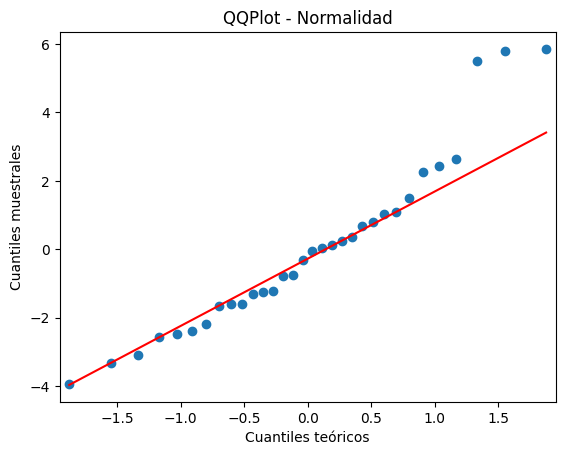

In [9]:
#a) A partir del gráfico qqplot
qqplot = sm.qqplot(residuos, line='q') #qqplot
qqplot = plt.title('QQPlot - Normalidad'), plt.xlabel('Cuantiles teóricos'), plt.ylabel('Cuantiles muestrales')
plt.show()

In [10]:
#b) Test normalidad -> Lilliefors 
test_normal = sm.stats.diagnostic.lilliefors(residuos)
print('Test Lilliefors: valor y p-value:', test_normal)

Test Lilliefors: valor y p-value: (0.11354012318772777, 0.37521740339258275)


`Residuos homocedasticos`

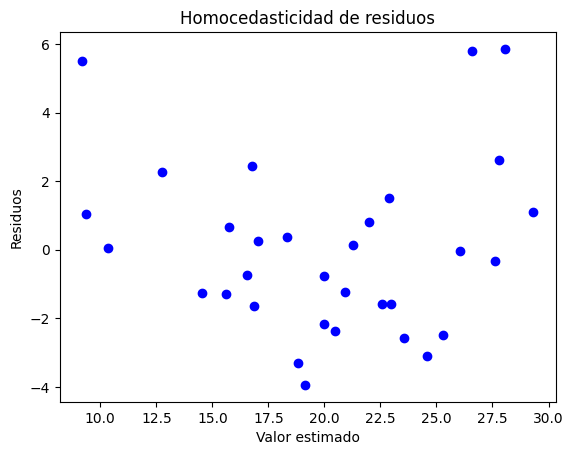

In [11]:
#a) Valores predichos vs residuos 
plt.plot(modelo_rgl.fittedvalues, residuos, 'bo')
plt.title('Homocedasticidad de residuos'), plt.xlabel("Valor estimado"), plt.ylabel("Residuos")
plt.show()

In [12]:
#b) Test Homocedasticidad -> Breusch-Pagan
test_homocedasticidad = sm.stats.diagnostic.het_breuschpagan(residuos, modelo_rgl.model.exog)
print('Test Lilliefors: valor y p-value:', test_homocedasticidad[0], test_homocedasticidad[1])

Test Lilliefors: valor y p-value: 0.88072247017843 0.6438038145444651


#### Residuos incorrelacionados

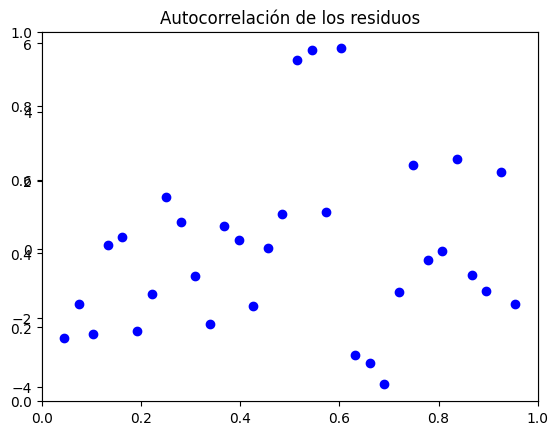

In [16]:
#a) Gráfico de autocorrelación
fig, ax1=plt.subplots()
ax1 = plt.axes(frameon=True)
ax1.axes.get_xaxis().set_visible(False) #para no mostrar ejeX
plt.plot(residuos, 'bo'), plt.title('Autocorrelación de los residuos')
plt.show()

In [20]:
#b) Test autocorrelación -> Ljung-Box
test_autocorrelacion = smd.acorr_ljungbox(residuos, lags=1)
test_autocorrelacion

,lb_stat,lb_pvalue
1,3.062774,0.080105


A la vista de los resultados, el modelo cumple las hipótesis de un modelo de regresión lineal múltiple